# Librairies

In [4]:
import pandas as pd
import sqlite3
import seaborn as sns
import matplotlib.pyplot as plt
import spacy 
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re


In [6]:
from processing import preprocess_reviews

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\lcisse\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\lcisse\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Connexion à la base de données

In [24]:
#Chemin vers la DB
db_path = "../../data/database.db"

# Connexion à la base de données
conn = sqlite3.connect(db_path)

# Extraction des données

In [9]:
query = "SELECT * FROM restaurants"

infos_resto = pd.read_sql_query(query, conn)
infos_resto.head()

,id,nom,type_cuisine,fourchette_prix,adresse,note_moyenne
0,1,L'affreux Jojo,"Italienne, Méditerranéenne, Saine","9,00€-15,00€","61 Rue de la Part-Dieu, 69003 Lyon France","5,0"
1,2,L'Argot,"Française, Européenne, Saine","15,00€-30,00€","132 Rue Bugeaud, 69006 Lyon France","4,5"
2,3,Bistrot Orcia,"Française, Européenne, Saine","16,00€-27,00€","15 B rue d Austerlitz, 69004 Lyon France","4,5"
3,4,Restaurant Paul Bocuse,"Française, Européenne, Saine","145,00€-200,00€","40 Quai De La Plage, 69660 Collonges-au-Mont-d...","4,5"
4,5,Brasserie L'Ouest,"Française, Européenne, Saine","22,00€-33,00€","1 Quai du Commerce, 69009 Lyon France","4,0"


In [23]:
# sauvegarde les 80 premiers lignes en csv
infos_resto.head(80).to_csv('infos_resto.csv', index=False)


In [31]:
# recuperer les avis par restaurant
query = "SELeCT * FROM avis"
avis1 = pd.read_sql_query(query, conn)

In [32]:
avis1.head() 

,id,id_restaurant,date,note,commentaire
0,1,1,déc. 2024,"5,0","Pizza excellente, bonne ambiance, très bon ser..."
1,2,1,déc. 2024,"5,0",C'est l'endroit parfait à Lyon pour manger une...
2,3,1,déc. 2024,"5,0",Nous avons dégustés d’excellentes pizze.\r\nUn...
3,4,1,nov. 2024,"4,0",Tres bel endroit en famille on mange très bien...
4,5,1,nov. 2024,"5,0",Très bonne pizza bien gourmande et pâtes du jo...


In [34]:
# appliquer la fonction de prétraitement sur les avis
avis1['commentaire'] = preprocess_reviews(avis1['commentaire'])

TypeError: string indices must be integers, not 'str'

In [4]:
#Receuil des avis pour le restaurant "L'affreux Jojo"
query = "SELECT * FROM avis WHERE id_restaurant = 1"

avis_1 = pd.read_sql_query(query, conn)
avis_1.head()

,id,id_restaurant,date,note,commentaire
0,1,1,déc. 2024,"5,0","Pizza excellente, bonne ambiance, très bon ser..."
1,2,1,déc. 2024,"5,0",C'est l'endroit parfait à Lyon pour manger une...
2,3,1,déc. 2024,"5,0",Nous avons dégustés d’excellentes pizze.\r\nUn...
3,4,1,nov. 2024,"4,0",Tres bel endroit en famille on mange très bien...
4,5,1,nov. 2024,"5,0",Très bonne pizza bien gourmande et pâtes du jo...


In [5]:
conn.close()

In [7]:
# Remplacer les virgules par des points
avis_1["note"] = avis_1["note"].str.replace(',', '.', regex=False)

#Typage de la colonne note en float
avis_1["note"] = avis_1["note"].astype(float)

# Statistiques descriptives

In [8]:
#Statistiques descriptives sur l'ensemble
mean_avis_1 = avis_1["note"].mean()
print(f"La moyenne des avis est de {round(mean_avis_1, 2)}")

nombre_avis_1 = avis_1.shape[0]
print(f"Le nombre total d'avis est de {nombre_avis_1}")

La moyenne des avis est de 4.83
Le nombre total d'avis est de 566


In [9]:
#Statistiques descriptives par année 
annees = ["2018","2019","2020","2021","2022","2023","2024"]
moy_annees = []

for i in annees : 
    avis = avis_1[avis_1["date"].str.contains(i)]
    mean_avis = avis["note"].mean()
    moy_annees.append(mean_avis)
    print(f"La moyenne des avis de {i} est de {round(mean_avis, 2)}")

La moyenne des avis de 2018 est de 4.94
La moyenne des avis de 2019 est de 4.81
La moyenne des avis de 2020 est de 4.62
La moyenne des avis de 2021 est de 4.71
La moyenne des avis de 2022 est de 4.74
La moyenne des avis de 2023 est de 4.85
La moyenne des avis de 2024 est de 4.92


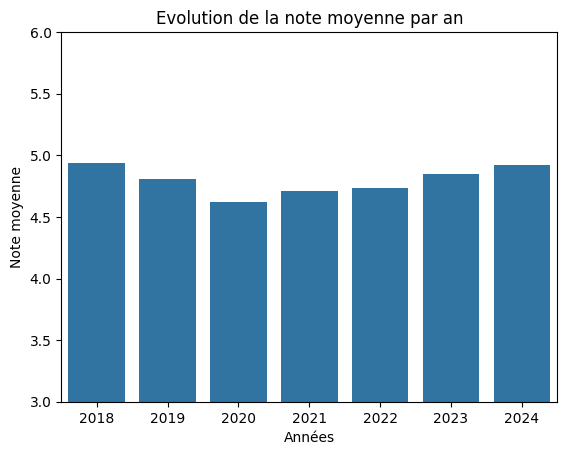

In [10]:
#Statistiques descriptives par année
sns.barplot(
    x=annees,
    y=moy_annees
)
plt.title("Evolution de la note moyenne par an")
plt.xlabel("Années")
plt.ylabel("Note moyenne")
plt.ylim((3, 6))
plt.show()


# Prétraitement des avis 

In [11]:
liste_avis_1 = avis_1["commentaire"]
list(liste_avis_1)

['Pizza excellente, bonne ambiance, très bon service, au top. On a demandé 2 jojo et 1 pizza et tout a été parfait.\r\n\r\nMerci bcpp!',
 "C'est l'endroit parfait à Lyon pour manger une pizza napolitaine tout à fait délicieuse!\r\nAmbiance et personnel très sympa!",
 'Nous avons dégustés d’excellentes pizze.\r\nUne pizza diavola juste piquante comme il faut et une pizza au jambon truffé, à la crème de truffe parsemé de buratta.\r\nUn repas carrément divin !!!',
 'Tres bel endroit en famille on mange très bien..je conseille...ce restaurant tres belle équipe.et une bonne ambiance',
 'Très bonne pizza bien gourmande et pâtes du jour délicieuse.\r\nDéco et cadre agréable \r\nAccueil très souriant.\r\nJe recommande sans hésiter.',
 "Une pizza ou un panozzo (je ne connaissais pas...) de qualité va forcément se trouver chez l'Affreux Jojo. Restaurant tenu par des jeunes gens très dynamiques.",
 'pizza au top ! Produit de qualité, serveurs très sympa\r\nPetit bémol si je devais en donner un, m

In [12]:
# Charger le modèle spaCy pour le français
nlp = spacy.load('fr_core_news_sm')
clean_avis_1 = []

# Traitement de chaque avis
for avis in liste_avis_1:
    # Supprimer les retours à la ligne et les espaces supplémentaires
    avis = re.sub(r'\r\n|\r|\n', ' ', avis)
    avis = re.sub(r'\s+', ' ', avis)
        
    # Convertir en minuscules
    avis = avis.lower()
        
    # Traiter le texte avec spaCy
    doc = nlp(avis)
        
    # Lemmatisation et suppression des stopwords et ponctuation
    cleaned_avis = " ".join([token.lemma_ for token in doc if token.text not in stopwords.words('french') and not token.is_punct])
        
    # Ajouter l'avis nettoyé à la liste
    clean_avis_1.append(cleaned_avis)

print(clean_avis_1)

['pizza excellent bon ambiance très bon service top avoir demander 2 jojo 1 pizza tout avoir parfaire merci bcpp', 'ce le endroit parfaire lyon manger pizza napolitain tout fait délicieux ambiance personnel très sympa', 'déguster d’ excellente pizz pizza diavola juste piquant comme falloir pizza jambon truffé crème truff parsemé buratta repas carrémer divin', 'tre bel endroit famille manger très bien conseiller restaurant tre bel équipe.et bon ambiance', 'très bon pizza bien gourmand pâte jour délicieux déco cadre agréable accueil très souriant recommander sans hésiter', 'pizza panozzo connaître qualité aller forcémer trouver chez le affreux jojo restaurer tenir jeune gens très dynamique', 'pizza top produit qualité serveur très sympa petit bémol si devoir donner musiqu légèrement trop fort', 'recommander ce adresse l’ ambiance très agréable serveur top nourriture excellent ☺ ️', 'super resto pizza délicieuse mention spécial supplément burrata recommander grandement', 'cadre super anim

In [13]:
#nltk.download('stopwords')

# Analyse des sentiments

In [14]:
from textblob import TextBlob

full_avis_1 = " ".join(clean_avis_1)
blob = TextBlob(full_avis_1)

print(f"Polarité des avis : {blob.sentiment.polarity}, Subjectivité des avis : {blob.sentiment.subjectivity} ")

Polarité des avis : 0.49082789154036355, Subjectivité des avis : 0.7223261313554767 


### Commentaires :
La polarité est comprise entre [-1, 1], -1 défini un sentiment négatif et 1 un sentiment positif. 
La subjectivité est comprise entre [0, 1], 0 défini un avis très objectif et 1 un avis qui reflète une opinion personnelle

# Topic Modeling

In [34]:
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer

#Tokenisation et transformation du texte en matrice de mots 
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(clean_avis_1)

#Appliquer le modèle LDA pour découvrir les thèmes
lda = LatentDirichletAllocation(n_components=2, random_state=0)
lda.fit_transform(X)

lda.components_

array([[ 0.61344365,  8.48033962,  8.10693856, ...,  1.47724496,
         2.3235186 ,  1.45590619],
       [ 1.38655635,  0.51966038,  4.89306144, ...,  0.52275504,
        12.6764814 ,  1.54409381]])

# Word Cloud 

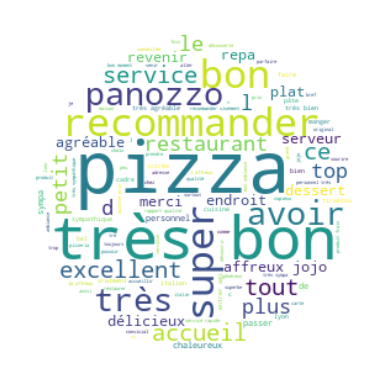

In [36]:
from wordcloud import WordCloud
import numpy as np

x, y = np.ogrid[:300, :300]

mask = (x - 150) ** 2 + (y - 150) ** 2 > 130 ** 2
mask = 255 * mask.astype(int)


wc = WordCloud(background_color="white", repeat=True, mask=mask)
wc.generate(full_avis_1)

plt.axis("off")
plt.imshow(wc, interpolation="bilinear")
plt.show()

# Mots-Clés avec TF IDF 

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer

#Initialisation du modèle TF IDF 
vec = TfidfVectorizer()
X = vec.fit_transform(clean_avis_1)

#Recupère les mots clés
mots_cles_1 = vec.get_feature_names_out()
print(len(mots_cles_1))

#Affichage des scores TF-IDF associés
scores = X.toarray()
print(scores)

1670
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


# Fermer la connexion à la base de données

In [17]:
conn.close()